In [1]:

import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow_datasets as tfds
import tensorflow as tf
import pandas as pd
import tensorflow_text
import dspy
import ast
from tqdm import tqdm
import math
from matplotlib.lines import Line2D
import pickle

2024-10-06 11:20:29.799122: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-06 11:20:29.981186: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-06 11:20:30.039578: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-06 11:20:30.055771: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-06 11:20:30.160342: I tensorflow/core/platform/cpu_feature_guar

In [2]:
def getFileName(file_path, title = False):
        # Extracting the file name without the extension
    file_name = os.path.splitext(os.path.basename(file_path))[0]

    # Formatting the title (replace underscores with spaces and capitalize)
    formatted_title = file_name
    if title:
        formatted_title = file_name.title

    return formatted_title

In [3]:
def saveAsPDF(filename):
    # Save the plot as a PDF for LaTeX embedding
    output_pdf = f'/work3/s174159/LLM_Thesis/plots/img_pdf/{filename}.pdf'
    plt.savefig(output_pdf)
    print("Saved image")

In [4]:
import pickle
import pandas as pd
def load_scores_rels(filepath):
    with open(filepath, "rb") as handle:
        scores_rels = pickle.load(handle)
    return scores_rels

# Load the general_metrics_df and class_metrics_df pickle files
def load_metrics_data(general_metrics_filepath, class_metrics_filepath):
    general_metrics_df = pd.read_pickle(general_metrics_filepath)
    class_metrics_df = pd.read_pickle(class_metrics_filepath)
    return general_metrics_df, class_metrics_df


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metrics(general_metrics_df, class_metrics_df):
    # Set the style for the plots
    sns.set(style="whitegrid")

    # Plot for General Metrics
    fig, axes = plt.subplots(2, 3, figsize=(30, 10))
    fig.suptitle('General Metrics over Experiments', fontsize=16)
    
    metrics = ['micro_f1', 'micro_precision', 'micro_recall', 'macro_f1', 'macro_precision', 'macro_recall']
    
    for idx, metric in enumerate(metrics):
        row = idx // 3
        col = idx % 3
        axes[row, col].plot(general_metrics_df.index, general_metrics_df[metric], marker='o')
        axes[row, col].set_title(metric)
        axes[row, col].set_xlabel('Experiment')
        axes[row, col].set_ylabel(metric)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Plot for Class-Specific Metrics
    unique_classes = class_metrics_df['class'].unique()

    for metric in ['f1', 'precision', 'recall', 'accuracy']:
        plt.figure(figsize=(30, 6))
        sns.barplot(data=class_metrics_df, x='class', y=metric)
        plt.title(f'Class-Specific {metric.capitalize()}')
        plt.xlabel('Class')
        plt.ylabel(metric.capitalize())
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()



In [6]:
def plot_metrics_with_class_occurrences_and_f1(general_metrics_df, class_metrics_df, class_occurrences_dict):
    # Set the style for the plots
    sns.set(style="whitegrid")

    # Plot for General Metrics
    fig, axes = plt.subplots(2, 3, figsize=(30, 10))
    fig.suptitle('General Metrics over Experiments', fontsize=16)
    
    metrics = ['micro_f1', 'micro_precision', 'micro_recall', 'macro_f1', 'macro_precision', 'macro_recall']
    
    for idx, metric in enumerate(metrics):
        row = idx // 3
        col = idx % 3
        axes[row, col].plot(general_metrics_df.index, general_metrics_df[metric], marker='o')
        axes[row, col].set_title(metric)
        axes[row, col].set_xlabel('Experiment')
        axes[row, col].set_ylabel(metric)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Plot for Class-Specific Metrics
    unique_classes = class_metrics_df['class'].unique()

    for metric in ['f1', 'precision', 'recall', 'accuracy']:
        plt.figure(figsize=(30, 6))
        sns.barplot(data=class_metrics_df, x='class', y=metric)
        plt.title(f'Class-Specific {metric.capitalize()}')
        plt.xlabel('Class')
        plt.ylabel(metric.capitalize())
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

    # Create a new DataFrame that includes the F1 scores and the class occurrences
    class_f1_scores = class_metrics_df.groupby('class')['f1'].mean().reindex(class_occurrences_dict.keys())
    combined_df = pd.DataFrame({
        'class': list(class_occurrences_dict.keys()),
        'occurrences': list(class_occurrences_dict.values()),
        'f1_score': class_f1_scores
    })

    # Plot for Class Occurrences with F1 scores
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot occurrences on the left y-axis
    ax1.bar(combined_df['class'], combined_df['occurrences'], color="lightblue", label="Occurrences")
    ax1.set_xlabel('Class', fontsize=14)
    ax1.set_ylabel('Number of Occurrences', fontsize=14, color="blue")
    ax1.tick_params(axis='y', labelcolor="blue")
    plt.xticks(rotation=45, ha="right")

    # Plot F1 scores on the right y-axis
    ax2 = ax1.twinx()
    ax2.plot(combined_df['class'], combined_df['f1_score'], color="red", marker='o', label="F1 Score")
    ax2.set_ylabel('F1 Score', fontsize=14, color="red")
    ax2.tick_params(axis='y', labelcolor="red")

    # Add title
    plt.title('Number of Times Each Class Occurs with Corresponding F1 Score', fontsize=16)

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_metrics_with_class_occurrences_and_f1(general_metrics_df, class_metrics_df, relation_type_counts)



In [7]:
def average_metrics(score_list):
    # Initialize a dictionary to hold the sum of all metrics
    avg_metrics = {
        'micro_f1': 0,
        'micro_precision': 0,
        'micro_recall': 0,
        'macro_f1': 0,
        'macro_precision': 0,
        'macro_recall': 0,
        'accuracy': 0,
        'class_metrics': {}
    }
    
    # First, we gather all classes across all score dictionaries
    all_classes = set()
    for scores in score_list:
        all_classes.update(scores['class_metrics'].keys())
    
    # Initialize the class_metrics to sum the values for each class
    for cls in all_classes:
        avg_metrics['class_metrics'][cls] = {
            'f1': 0,
            'precision': 0,
            'recall': 0,
            'accuracy': 0
        }
    
    # Accumulate metrics across all score dictionaries
    for scores in score_list:
        avg_metrics['micro_f1'] += scores['micro_f1']
        avg_metrics['micro_precision'] += scores['micro_precision']
        avg_metrics['micro_recall'] += scores['micro_recall']
        avg_metrics['macro_f1'] += scores['macro_f1']
        avg_metrics['macro_precision'] += scores['macro_precision']
        avg_metrics['macro_recall'] += scores['macro_recall']
        avg_metrics['accuracy'] += scores['accuracy']
        
        # Accumulate class metrics
        for cls, metrics in scores['class_metrics'].items():
            avg_metrics['class_metrics'][cls]['f1'] += metrics['f1']
            avg_metrics['class_metrics'][cls]['precision'] += metrics['precision']
            avg_metrics['class_metrics'][cls]['recall'] += metrics['recall']
            avg_metrics['class_metrics'][cls]['accuracy'] += metrics['accuracy']
    
    # Calculate averages
    num_scores = len(score_list)
    
    avg_metrics['micro_f1'] /= num_scores
    avg_metrics['micro_precision'] /= num_scores
    avg_metrics['micro_recall'] /= num_scores
    avg_metrics['macro_f1'] /= num_scores
    avg_metrics['macro_precision'] /= num_scores
    avg_metrics['macro_recall'] /= num_scores
    avg_metrics['accuracy'] /= num_scores
    
    # Calculate per-class averages
    for cls in avg_metrics['class_metrics']:
        avg_metrics['class_metrics'][cls]['f1'] /= num_scores
        avg_metrics['class_metrics'][cls]['precision'] /= num_scores
        avg_metrics['class_metrics'][cls]['recall'] /= num_scores
        avg_metrics['class_metrics'][cls]['accuracy'] /= num_scores
    
    return avg_metrics


## Load the data from the original notebook

In [8]:
LOAD_FROM_FILES = True

In [9]:
SAMPLE_SIZE = 100

In [10]:
if LOAD_FROM_FILES:
    test_input = pd.read_json("/work3/s174159/LLM_Thesis/data/Final/Combined/test_sampled.json")
    dev_input = pd.read_json("/work3/s174159/LLM_Thesis/data/Final/Combined/dev_sampled.json")
    sampled_df = pd.read_json("/work3/s174159/LLM_Thesis/data/Final/Combined/train_sampled.json")

df1 = pd.read_json('/work3/s174159/LLM_Thesis/data/Final/Combined/train_annotated.json')
#df2 = pd.read_json("/work3/s174159/LLM_Thesis/data/No_Constraints/Data_Finalized/Combined/train_distant.json")
dataframes = [df1]
df = pd.concat(dataframes)
df['org_dataset'].value_counts()

org_dataset
NYT         56196
ReDocRED     3053
CrossRE      1940
CoNLL04       922
SciERC        350
Name: count, dtype: int64

In [11]:
def sample_equal_per_class(df, sample_size, column_name):
    unique_classes = df[column_name].unique()
    n_samples_per_class = sample_size // len(unique_classes)  # Equal samples per class

    sampled_df = pd.DataFrame()

    # Sample equal number of samples from each class
    for category in unique_classes:
        sampled_df = pd.concat([sampled_df, df[df[column_name] == category].sample(n=n_samples_per_class, random_state=42)])

    return sampled_df.sample(frac=1).reset_index(drop=True)


In [12]:
def sample_with_distribution(df, sample_size, column_name): 
    proportions = df[column_name].value_counts(normalize=True)

    samples_per_class = (proportions * sample_size).round().astype(int)

    sampled_df = pd.DataFrame()

    # Sample from each class accourding to samples. 
    for category, n_samples in samples_per_class.items():
        sampled_df = pd.concat([sampled_df, df[df[column_name] == category].sample(n=n_samples, random_state=42)])
    

    return sampled_df.sample(frac=1).reset_index(drop=True)


In [13]:
if not LOAD_FROM_FILES:
    sampled_df = sample_equal_per_class(df, SAMPLE_SIZE, 'org_dataset')

Saved image


<Figure size 1000x600 with 0 Axes>

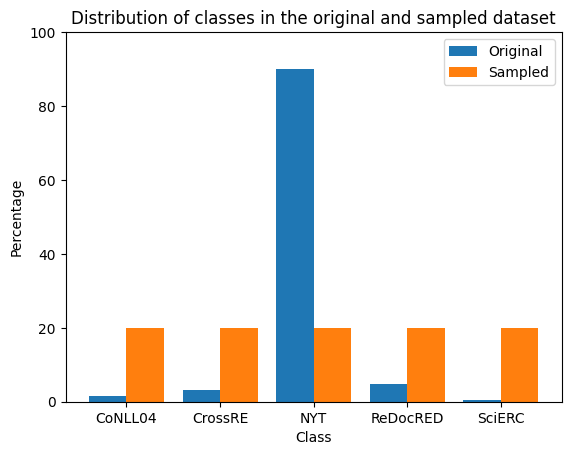

In [14]:
import matplotlib.pyplot as plt

original_distribution = df['org_dataset'].value_counts(normalize=True) * 100
sampled_distribution = sampled_df['org_dataset'].value_counts(normalize=True) * 100


distribution_df = pd.DataFrame({'Original': original_distribution, 'Sampled': sampled_distribution}).sort_index()

plt.figure(figsize=(10, 6))
distribution_df.plot(kind='bar', width=0.8)
plt.title('Distribution of classes in the original and sampled dataset')
plt.ylabel('Percentage')
plt.xlabel('Class')
plt.xticks(rotation=0)
plt.ylim(0,100)
saveAsPDF("even_distribution")
plt.show()

/tmp/ipykernel_1058590/3788581071.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('org_dataset', group_keys=False).apply(lambda x: x.sample(frac=50/len(df), random_state=42))


Saved image


<Figure size 1000x600 with 0 Axes>

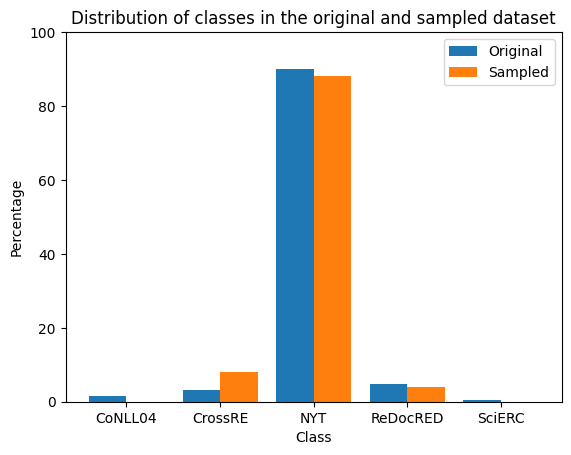

In [15]:
# Assuming 'df' is your dataframe and 'org_dataset' is the column with dataset names
# Sample 50 rows with stratified sampling based on 'org_dataset'
sampled_df = df.groupby('org_dataset', group_keys=False).apply(lambda x: x.sample(frac=50/len(df), random_state=42))

# If the total dataset size isn't exactly 50, you may need to adjust
# for any rounding errors to ensure you get exactly 50 samples.

sampled_df = sampled_df.sample(50, random_state=42, replace=True)


original_distribution = df['org_dataset'].value_counts(normalize=True) * 100
sampled_distribution = sampled_df['org_dataset'].value_counts(normalize=True) * 100


distribution_df = pd.DataFrame({'Original': original_distribution, 'Sampled': sampled_distribution}).sort_index()

plt.figure(figsize=(10, 6))
distribution_df.plot(kind='bar', width=0.8)
plt.title('Distribution of classes in the original and sampled dataset')
plt.ylabel('Percentage')
plt.xlabel('Class')
plt.xticks(rotation=0)
plt.ylim(0,100)
saveAsPDF("Distribution_of_datasets")
plt.show()

In [16]:
# Prepare the DSPY dataset
dataset = []
for org_dataset, title, domains, sents, vertexSet, labels, original_file_path in tqdm(sampled_df.values, total=len(sampled_df), desc="Creating dataset - Processing row"):
    # Convert JSON strings to Python objects
    sents = (sents)
    vertexSet = (vertexSet)
    labels = (labels)
    
    entity_types = list(set([entity['type'] for entity_list in vertexSet for entity in entity_list]))
    relation_types = list(set([relation['r'] for relation in labels]))
    
    # Create a DSPY example and append to the dataset
    example = dspy.Example(
        sentences=str(sents), 
        entities=vertexSet, 
        relations=labels
    ).with_inputs('sentences', 'entity_types', 'relation_types')

    # Attach entity_types and relation_types to the example
    example['entity_types'] = str(entity_types)
    example['relation_types'] = str(relation_types)
    
    dataset.append(example)

# Now the dataset is ready for use with DSPY
print(f"Total examples created: {len(dataset)}")

# Check one example to see the structure
print(dataset[0])


Creating dataset - Processing row: 100%|██████████| 50/50 [00:00<00:00, 38699.98it/s]

Total examples created: 50
Example({'sentences': '[[\'The\', \'news\', \'of\', \'the\', \'pope\', "\'s", \'second\', \'hospitalization\', \'in\', \'so\', \'short\', \'a\', \'time\', \'sparked\', \'expressions\', \'of\', \'concern\', \',\', \'from\', \'his\', \'hometown\', \',\', \'Wadowice\', \',\', \'Poland\', \',\', \'to\', \'Africa\', \',\', \'Southeast\', \'Asia\', \',\', \'as\', \'well\', \'as\', \'in\', \'Gemelli\', \'hospital\', \',\', \'about\', \'two\', \'miles\', \'from\', \'the\', \'Vatican\', \'.\', "\'\'"]]', 'entities': [[{'name': 'Poland', 'pos': [24, 25], 'type': 'Location', 'sent_id': 0}], [{'name': 'Wadowice', 'pos': [22, 23], 'type': 'Location', 'sent_id': 0}], [{'name': 'Africa', 'pos': [27, 28], 'type': 'Location', 'sent_id': 0}], [{'name': 'Southeast Asia', 'pos': [29, 31], 'type': 'Location', 'sent_id': 0}], [{'name': 'Gemelli', 'pos': [36, 37], 'type': 'Location', 'sent_id': 0}]], 'relations': [{'h': 0, 't': 1, 'r': 'Contains location', 'evidence': [0]}], 'entit

In [17]:
if not LOAD_FROM_FILES:
    dev_input = pd.read_json("/work3/s174159/LLM_Thesis/data/No_Constraints/Data_Finalized/Combined/dev.json")
    dev_input = sample_equal_per_class(dev_input, SAMPLE_SIZE, 'org_dataset')

In [18]:
# Prepare the DSPY dataset
dev_data = []
for org_dataset, title, domains, sents, vertexSet, labels, original_file_path in tqdm(dev_input.values, total=len(dev_input), desc="Creating dataset - Processing row"):
    # Convert JSON strings to Python objects
    sents = (sents)
    vertexSet = (vertexSet)
    labels = (labels)
    
    # Extract entity types and relation types for the current row
    entity_types = list(set([entity['type'] for entity_list in vertexSet for entity in entity_list]))
    relation_types = list(set([relation['r'] for relation in labels]))
    
    # Create a DSPY example and append to the dataset
    example = dspy.Example(
        sentences=str(sents), 
        entities=vertexSet, 
        relations=labels
    ).with_inputs('sentences', 'entity_types', 'relation_types')

    # Attach entity_types and relation_types to the example
    example['entity_types'] = str(entity_types)
    example['relation_types'] = str(relation_types)
    
    dev_data.append(example)

# Now the dataset is ready for use with DSPY
print(f"Total examples created: {len(dev_data)}")

# Check one example to see the structure
print(dev_data[0])


Creating dataset - Processing row: 100%|██████████| 50/50 [00:00<00:00, 39621.24it/s]

Total examples created: 50
Example({'sentences': "[['Composer', 'Thomas', 'is', 'a', 'native', 'of', 'Chisholm', ',', 'Minn', '.']]", 'entities': [[{'name': 'Thomas', 'pos': [1, 2], 'type': 'Person', 'sent_id': 0}], [{'name': 'Chisholm', 'pos': [6, 7], 'type': 'Location', 'sent_id': 0}], [{'name': 'Minn .', 'pos': [8, 10], 'type': 'Location', 'sent_id': 0}]], 'relations': [{'r': 'Live in', 'h': 0, 't': 1, 'evidence': [0]}, {'r': 'Live in', 'h': 0, 't': 2, 'evidence': [0]}, {'r': 'Located in', 'h': 1, 't': 2, 'evidence': [0]}], 'entity_types': "['Person', 'Location']", 'relation_types': "['Located in', 'Live in']"}) (input_keys={'relation_types', 'entity_types', 'sentences'})


In [19]:
if not LOAD_FROM_FILES:
    test_input = pd.read_json("/work3/s174159/LLM_Thesis/data/No_Constraints/Data_Finalized/Combined/test.json")
    test_input = sample_equal_per_class(test_input, SAMPLE_SIZE, 'org_dataset')

In [20]:
if not LOAD_FROM_FILES:
    test_input.to_json("/work3/s174159/LLM_Thesis/data/No_Constraints/Data_Finalized/Combined/test_sampled.json")
    dev_input.to_json("/work3/s174159/LLM_Thesis/data/No_Constraints/Data_Finalized/Combined/dev_sampled.json")
    sampled_df.to_json("/work3/s174159/LLM_Thesis/data/No_Constraints/Data_Finalized/Combined/train_sampled.json")

In [21]:
# Prepare the DSPY dataset
test_data = []
for org_dataset, title, domains, sents, vertexSet, labels, original_file_path in tqdm(test_input.values, total=len(test_input), desc="Creating dataset - Processing row"):
    # Convert JSON strings to Python objects
    sents = (sents)
    vertexSet = (vertexSet)
    labels = (labels)
    
    # Extract entity types and relation types for the current row
    entity_types = list(set([entity['type'] for entity_list in vertexSet for entity in entity_list]))
    relation_types = list(set([relation['r'] for relation in labels]))
    
    # Create a DSPY example and append to the dataset
    example = dspy.Example(
        sentences=str(sents), 
        entities=vertexSet, 
        relations=labels
    ).with_inputs('sentences', 'entity_types', 'relation_types')

    # Attach entity_types and relation_types to the example
    example['entity_types'] = str(entity_types)
    example['relation_types'] = str(relation_types)
    
    test_data.append(example)

# Now the dataset is ready for use with DSPY
print(f"Total examples created: {len(test_data)}")

# Check one example to see the structure
print(test_data[0])


Creating dataset - Processing row: 100%|██████████| 50/50 [00:00<00:00, 32519.03it/s]

Total examples created: 50
Example({'sentences': "[['This', 'paper', 'considers', 'the', 'problem', 'of', 'reconstructing', 'the', 'motion', 'of', 'a', '3D', 'articulated', 'tree', 'from', '2D', 'point', 'correspondences', 'subject', 'to', 'some', 'temporal', 'prior', '.'], ['Hitherto', ',', 'smooth', 'motion', 'has', 'been', 'encouraged', 'using', 'a', 'trajectory', 'basis', ',', 'yielding', 'a', 'hard', 'combinatorial', 'problem', 'with', 'time', 'complexity', 'growing', 'exponentially', 'in', 'the', 'number', 'of', 'frames', '.'], ['Branch', 'and', 'bound', 'strategies', 'have', 'previously', 'attempted', 'to', 'curb', 'this', 'complexity', 'whilst', 'maintaining', 'global', 'optimality', '.'], ['However', ',', 'they', 'provide', 'no', 'guarantee', 'of', 'being', 'more', 'efficient', 'than', 'exhaustive', 'search', '.'], ['Inspired', 'by', 'recent', 'work', 'which', 'reconstructs', 'general', 'trajectories', 'using', 'compact', 'high-pass', 'filters', ',', 'we', 'develop', 'a', 'dyn

In [22]:
from collections import Counter
relations_type_counter = Counter()

for sample in test_data: 
    relation_types = sample.inputs()['relation_types']
    relations_type_counter.update(ast.literal_eval(relation_types))

relation_types_count = dict(relations_type_counter)
print(relation_types_count)

{'Used for': 9, 'Compare': 3, 'Feature of ': 5, 'Evaluate for': 3, 'General affiliation': 5, 'Physical': 3, 'Organization based in': 3, 'Live in': 4, 'Contains location': 7, 'Parent organization': 1, 'Member of': 4, 'Inception': 2, 'Contains adminstrative territorial entity': 6, 'Location': 5, 'Subsidiary': 1, 'Country': 9, 'Located in': 13, 'Part of': 8, 'Has part': 3, 'Continent': 2, 'Owned by': 1, 'Dissolved, abolished or demolished': 1, 'Conjunction': 5, 'Role': 4, 'Named': 2, 'Neighborhood': 1, 'Place lived': 2, 'Hyponym of': 3, 'Start time': 1, 'Point in time': 1, 'Conflict': 1, 'Ethnic group': 1, 'Participant': 1, 'End time': 1, 'Cast member': 1, 'Publication date': 2, 'Country of citizenship': 4, 'Genre': 1, 'Notable work': 2, 'Present in work': 1, 'Performer': 1, 'Country of origin': 1, 'Publisher': 1, 'Works for': 2, 'Artifact': 2, 'Opposite': 1, 'Creator': 1, 'Educated at': 3, 'Date of birth': 3, 'Instance of': 1, 'Place of death': 2, 'Date of death': 3, 'Place of birth': 3,

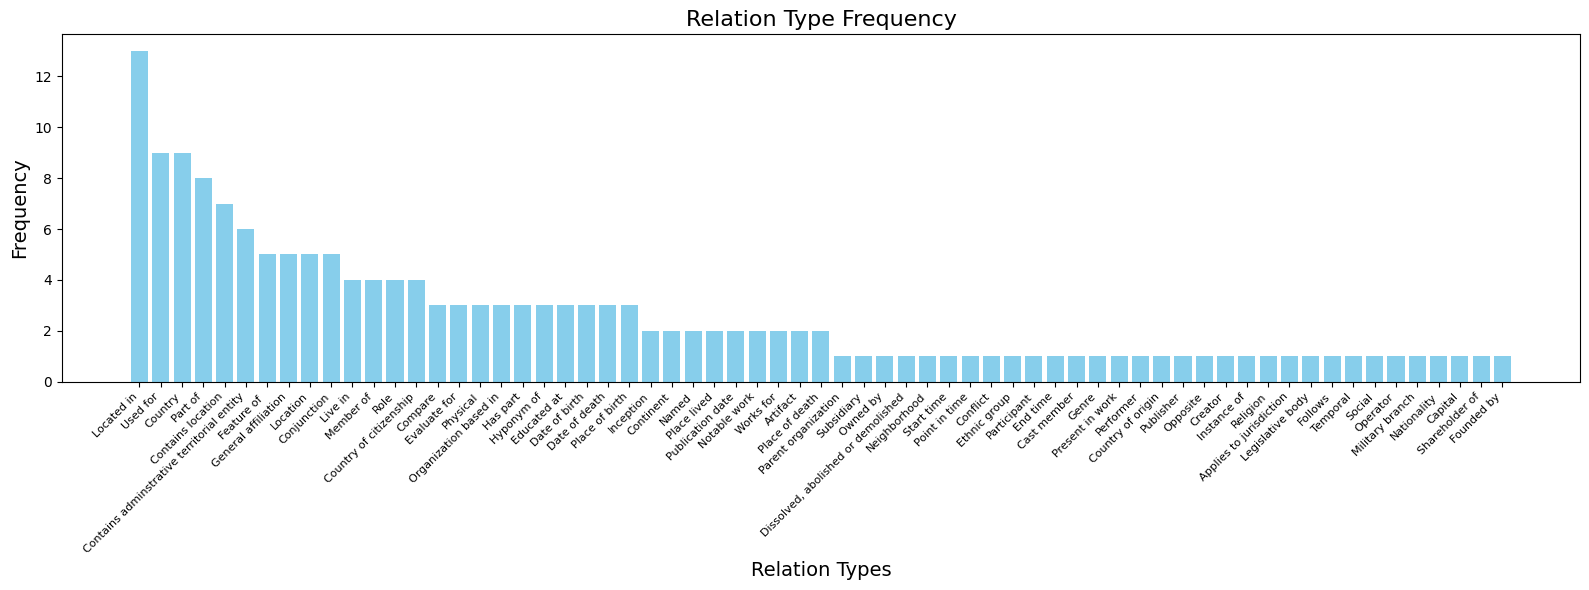

In [23]:
# Convert dictionary keys and values into separate lists for plotting
x_values = list(relation_types_count.keys())
y_values = list(relation_types_count.values())

# Combine the two lists and sort them by values (frequencies) in descending order
sorted_data = sorted(zip(x_values, y_values), key=lambda x: x[1], reverse=True)

# Unzip the sorted data back into two separate lists
x_values_sorted, y_values_sorted = zip(*sorted_data)

# Set the style for the plot
plt.figure(figsize=(16, 6))
plt.bar(x_values_sorted, y_values_sorted, color="skyblue")

# Add title and labels
plt.title('Relation Type Frequency', fontsize=16)
plt.xlabel('Relation Types', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize = 8)  # Rotate x labels for better readability
# rotation_mode='anchor'

# Display the plot
plt.tight_layout()
plt.show()





In [24]:
# Load the Combined_Global_types.xlsx file
file_path = '/work3/s174159/LLM_Thesis/databuilding/types/Combined_Global_types.xlsx'
xls = pd.ExcelFile(file_path)

# Load the 'Relations' sheet
relations_df = pd.read_excel(xls, 'Relations')

# Extract the 'Cleaned Entities' column, which contains the global list of types
global_entity_types = relations_df['Cleaned Relations'].dropna().unique()
global_entity_types

array(['Applies to jurisdiction', 'Artifact', 'Author', 'Award received',
       'Basin country', 'Capital', 'Cast member', 'Cause effect',
       'Chairperson', 'Characters', 'Child', 'Claimed by', 'Compare',
       'Composer', 'Conflict', 'Conjunction', 'Contains location',
       'Contains adminstrative territorial entity', 'Continent',
       'Country', 'Country of citizenship', 'Country of origin',
       'Creator', 'Date of birth', 'Date of death', 'Developer',
       'Director', 'Dissolved, abolished or demolished', 'Educated at',
       'Employer', 'End time', 'Ethnic group', 'Ethnicity',
       'Evaluate for', 'Father', 'Feature of ', 'Follows', 'Founded by',
       'Founded in', 'General affiliation', 'Genre', 'Has part',
       'Head of government', 'Head of state', 'Location', 'Hyponym of',
       'Inception', 'Industry', 'Influenced by', 'Instance of', 'Kill',
       'Languages spoken, written or signed', 'League',
       'Legislative body', 'Live in', 'Located in', 'Lyric

In [52]:
def get_number_of_parsing_errors(path,name):
    incorrect_format_filepath = None
    with (open(os.path.join(path,f"dspy_{name}_incorrect_format.pkl"), "rb")) as openfile:
        incorrect_format_filepath = pickle.load(openfile)

    if incorrect_format_filepath == None:
        raise ModuleNotFoundError
    
    return len(incorrect_format_filepath)

In [50]:
relation_mapping = None
with (open("/work3/s174159/LLM_Thesis/class_mapping.pkl", "rb")) as openfile:
    relation_mapping = pickle.load(openfile)

if relation_mapping == None:
    raise ModuleNotFoundError

def plot_metrics_with_class_occurrences_and_f1_prettier_updated(class_metrics_df, class_occurrences_dict, global_entity_types):
    """
    This function plots general metrics, class-specific metrics, and a plot showing the number of occurrences
    of each class in the test set with corresponding F1 scores.

    Args:
    general_metrics_df: DataFrame containing general metrics across experiments.
    class_metrics_df: DataFrame containing class-specific metrics (F1, precision, recall, accuracy).
    class_occurrences_dict: Dictionary with relation types as keys and occurrence counts as values.
    global_entity_types: Array containing the global list of entity types present in the dataset.
    """

    # Define a function to color based on the conditions
    def get_color_for_class(cls):
        try:
            match relation_mapping[cls.strip()]:
                case "both":
                    return 'tab:green'
                case "sentence-based":
                    return 'tab:blue'
                case "document-based":
                    return 'tab:purple'
                case _:
                    print(f"'{relation_mapping[cls.strip()]}' could not read correctly")
                    raise ValueError
        except KeyError:
            # print(f"'{cls}' is not in relation_mapping, might be hallucination")
            return 'black'
        # if cls in class_occurrences_dict and cls in global_entity_types:
        #     return 'tab:blue'  # Present in both test set and global list
        # elif cls in global_entity_types and cls not in class_occurrences_dict:
        #     return 'tab:green'  # Present in the global list but not in the test set
        # else:
        #     return 'tab:purple'  # Not present in either the test set or the global list

    # Apply the color function to each class for class-specific plots
    # colors = [get_color_for_class(cls) for cls in class_metrics_df['class']]

    # Plot for Class-Specific Metrics (F1, Precision, Recall, Accuracy)
    # for metric in ['f1', 'precision', 'recall', 'accuracy']:
    #     plt.figure(figsize=(30, 6))
    #     sns.barplot(data=class_metrics_df, x='class', y=metric, palette=colors)
    #     plt.title(f'Class-Specific {metric.capitalize()}', fontsize=16)
    #     plt.xlabel('Class', fontsize=14)
    #     plt.ylabel(metric.capitalize(), fontsize=14)
    #     plt.xticks(rotation=90, ha="right")
    #     plt.tight_layout()
    #     plt.show()

    
    hallucinations = set()
    for cls in class_metrics_df["class"]:
        if cls not in class_occurrences_dict:
            # class_occurrences_dict[cls] = 0
            hallucinations.add(cls)
    if len(hallucinations) >0:
        print("hallucinations:")
        for cls in hallucinations:
            print(cls)


    # Create a new DataFrame that includes the F1 scores and the class occurrences
    class_f1_scores = class_metrics_df.groupby('class')['f1'].mean().reindex(class_occurrences_dict.keys(), fill_value=0)
    combined_df = pd.DataFrame({
        'class': list(class_occurrences_dict.keys()),
        'occurrences': list(class_occurrences_dict.values()),
        'f1_score': class_f1_scores
    })

    # Sort the combined_df by the 'occurrences' column in descending order
    combined_df = combined_df.sort_values(by='occurrences', ascending=False)

    # Apply the color function for the occurrences plot
    colors_combined = [get_color_for_class(cls) for cls in combined_df['class']]

    # Plot for Class Occurrences with F1 scores (dots only, no lines)
    fig, ax1 = plt.subplots(figsize=(18, 8))

    # Plot occurrences on the left y-axis
    bars = ax1.bar(combined_df['class'], combined_df['occurrences'], color=colors_combined, label="Occurrences", zorder=3)
    ax1.set_xlabel('Class', fontsize=14)
    ax1.set_ylabel('Number of Occurrences', fontsize=14, color="black")
    ax1.tick_params(axis='y', labelcolor="black")
    ax1.grid(True, which='both', axis='y', linestyle='--')
    # plt.xticks(rotation=42, fontsize=10)
    plt.xticks(rotation=45, fontsize=10, ha="right", rotation_mode='anchor')
    # Align xticks with bars
    ax1.set_xticks([bar.get_x() + bar.get_width() / 2 for bar in bars])
    ax1.set_xticklabels(combined_df['class'])
    # for label in ax1.get_xticklabels():
    #     class_name = label.get_text()
    #     # print(class_name)
    #     if class_occurrences_dict[class_name] == 0:
    #         label.set_fontweight('bold')

    ax1.legend(handles=[Line2D([0], [0], color='tab:green', lw=4, label="Document- & Sentence-based"),
                        Line2D([0], [0], color='tab:blue', lw=4, label="Sentence-based"),
                        Line2D([0], [0], color='tab:purple', lw=4, label="Document-based")], loc='upper right', ncols=3, fontsize=12)

    ax1.axhline(2.8, lw=0.6, color="grey")
    ax1.axhline(5.6, lw=0.6, color="grey")
    ax1.axhline(8.4, lw=0.6, color="grey")
    ax1.axhline(11.2, lw=0.6, color="grey")

    ax1.set_ylim(0, math.floor(max(combined_df['occurrences']) * 1.1))  # Slightly increase the max limit for better spacing
    # ax1.set_ylim(0,14)

    # Plot F1 scores as red dots (scatter only, no lines) on the right y-axis
    ax2 = ax1.twinx()
    ax2.scatter(combined_df['class'], combined_df['f1_score'], color="tab:orange", label="F1 Score", zorder=4, s=60)  # s=60 adjusts the size of the dots
    ax2.set_ylabel('F1 Score', fontsize=14, color="tab:orange")
    ax2.tick_params(axis='y', labelcolor="tab:orange")
    # ax2.grid(True, which="both",axis="y", linestyle="-")

    # Align the scales if necessary to avoid a visual shift in the y-axes
    
    ax2.set_ylim(0, 1.0)  # Since F1 score is between 0 and 1

    # Add title
    plt.title('Number of Times Each Class Occurs with Corresponding F1 Score', fontsize=16)
    plt.tight_layout()

    # Save as SVG if needed
    print("-----------------------")
    saveAsPDF(getFileName(scores_rels_filepath))
    

    # Show the plot
    plt.show()


## GPT4oMini - Zero Shot

In [51]:


# Filepaths for the saved pickle files
scores_rels_filepath = "/work3/s174159/LLM_Thesis/plots/data/dspy_dspy_0_shot_scores_rels.pkl"
general_metrics_filepath = "/work3/s174159/LLM_Thesis/plots/data/dspy_dspy_0_shot_general_metrics_df.pkl"
class_metrics_filepath = "/work3/s174159/LLM_Thesis/plots/data/dspy_dspy_0_shot_general_class_metrics_df.pkl"

# Load the data
scores_rels = load_scores_rels(scores_rels_filepath)
general_metrics_df, class_metrics_df = load_metrics_data(general_metrics_filepath, class_metrics_filepath)


hallucinations:
Position
based in
Awarded
Feature of
is a part of
Contains administrative territorial entity
Taught
contributed to
Contains
Membership
used for
Saved image


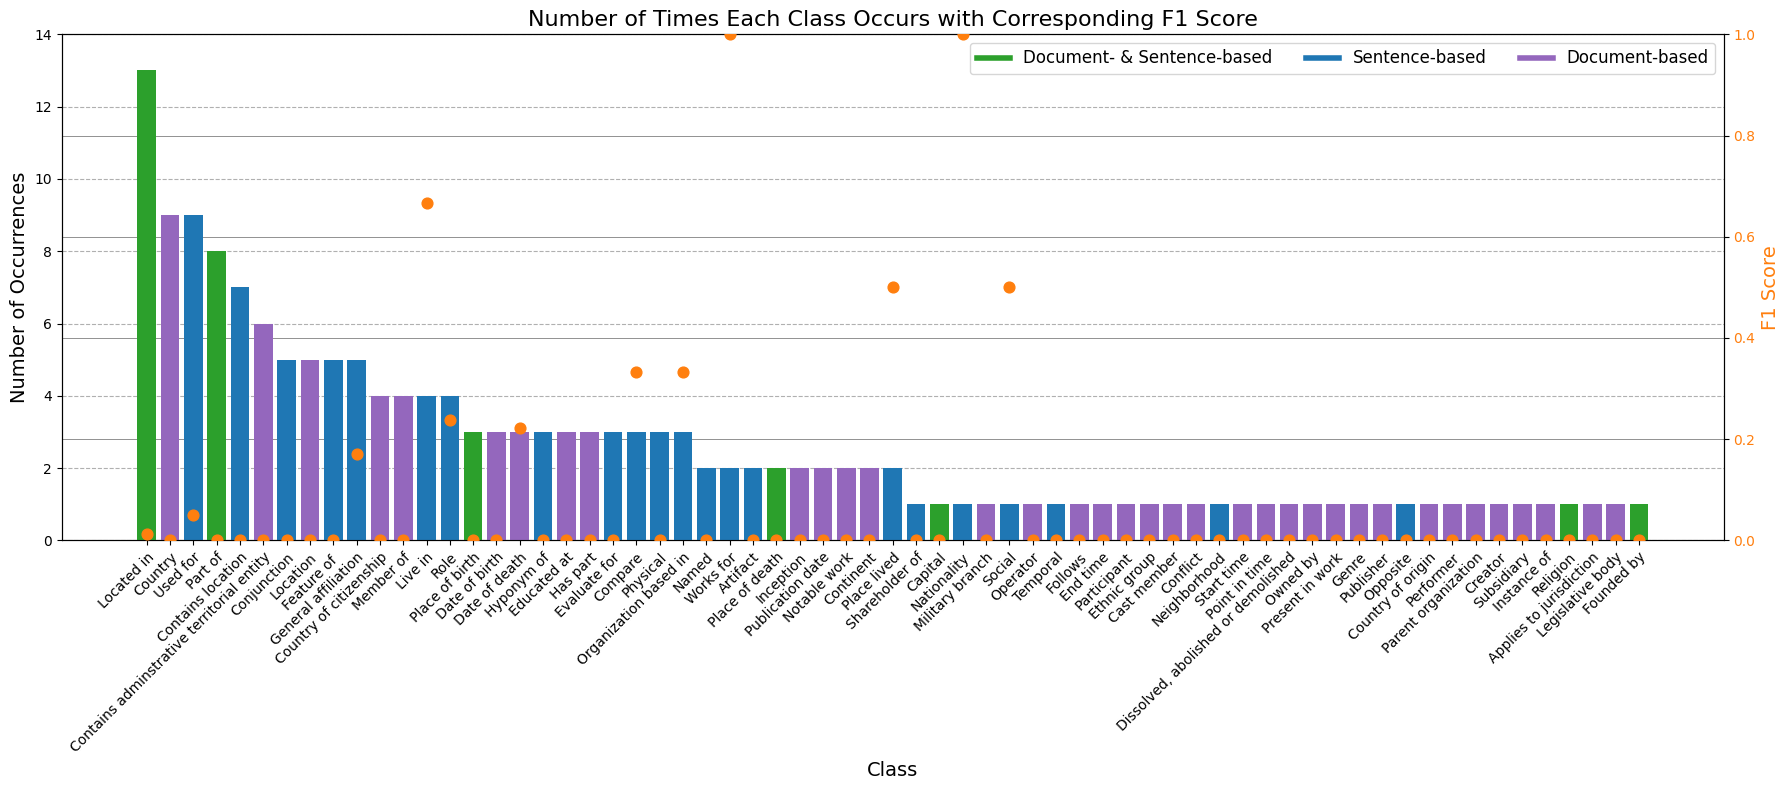

In [45]:
# Assuming you have general_metrics_df, class_metrics_df, and relation_type_counts already prepared
plot_metrics_with_class_occurrences_and_f1_prettier_updated(class_metrics_df, relation_types_count, global_entity_types)


In [53]:
get_number_of_parsing_errors("/work3/s174159/LLM_Thesis/plots/data","dspy_0_shot")

3

## GPT4oMini - 3 shot

In [28]:


# Filepaths for the saved pickle files
scores_rels_filepath = "/work3/s174159/LLM_Thesis/plots/data/dspy_3_shot_scores_rels.pkl"
general_metrics_filepath = "/work3/s174159/LLM_Thesis/plots/data/dspy_3_shot_general_metrics_df.pkl"
class_metrics_filepath = "/work3/s174159/LLM_Thesis/plots/data/dspy_3_shot_general_class_metrics_df.pkl"

# Load the data
scores_rels = load_scores_rels(scores_rels_filepath)
general_metrics_df, class_metrics_df = load_metrics_data(general_metrics_filepath, class_metrics_filepath)


hallucinations:
Feature of
Contains administrative territorial entity
Saved image


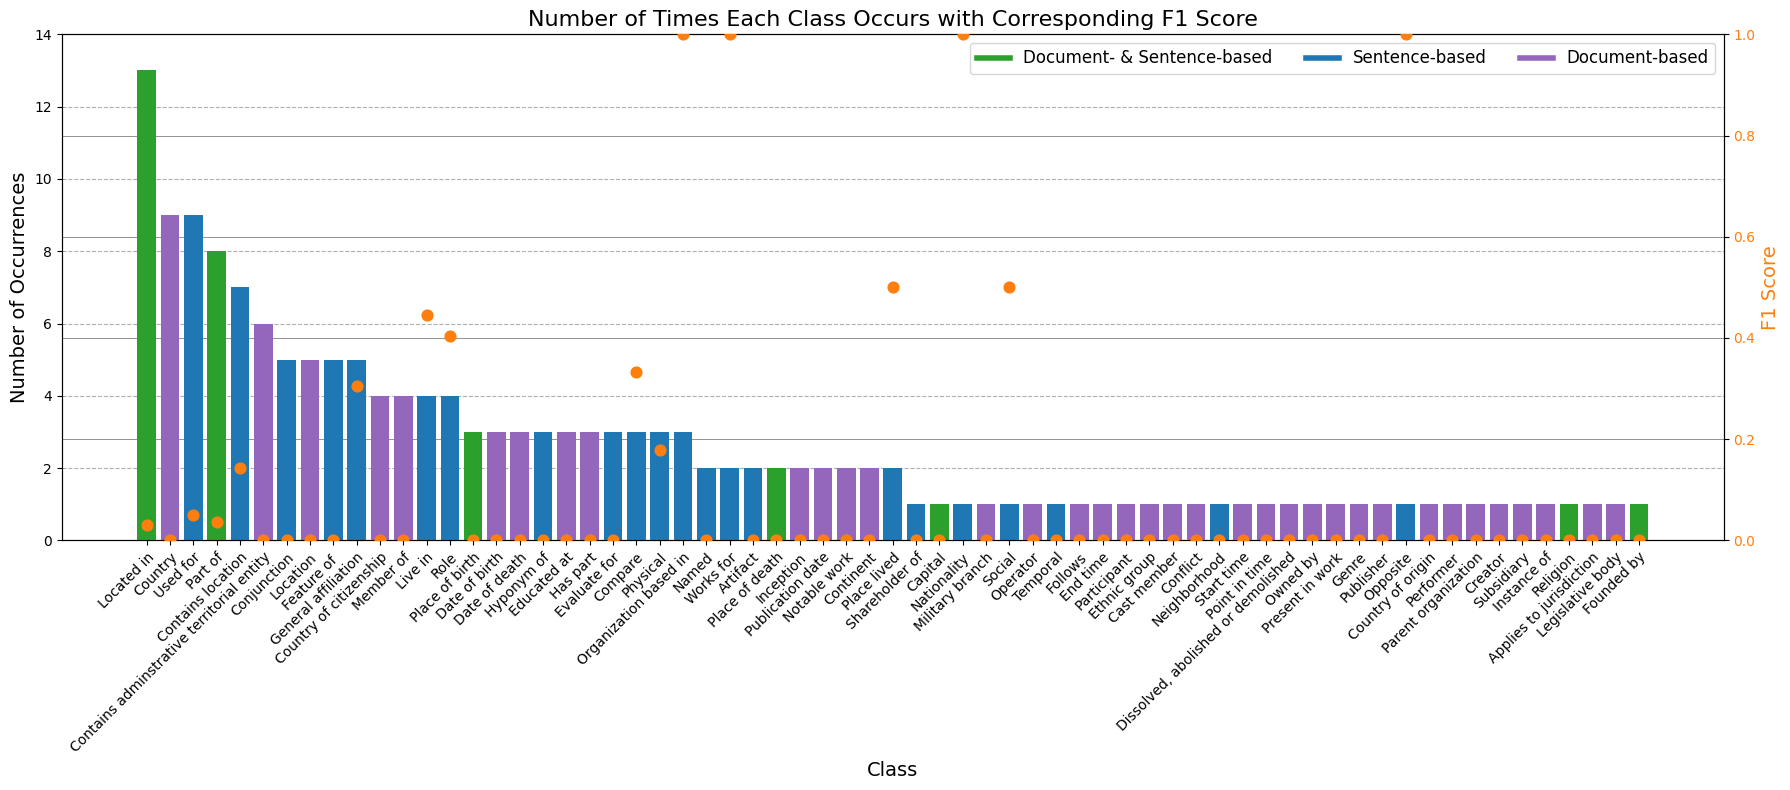

In [29]:
# Assuming you have general_metrics_df, class_metrics_df, and relation_type_counts already prepared
plot_metrics_with_class_occurrences_and_f1_prettier_updated(class_metrics_df, relation_types_count, global_entity_types)


In [54]:
get_number_of_parsing_errors("/work3/s174159/LLM_Thesis/plots/data","3_shot")

3

## GPT4oMini - 6 shot

In [30]:


# Filepaths for the saved pickle files
scores_rels_filepath = "/work3/s174159/LLM_Thesis/plots/data/dspy_6_shot_scores_rels.pkl"
general_metrics_filepath = "/work3/s174159/LLM_Thesis/plots/data/dspy_6_shot_general_metrics_df.pkl"
class_metrics_filepath = "/work3/s174159/LLM_Thesis/plots/data/dspy_6_shot_general_class_metrics_df.pkl"

# Load the data
scores_rels = load_scores_rels(scores_rels_filepath)
general_metrics_df, class_metrics_df = load_metrics_data(general_metrics_filepath, class_metrics_filepath)


hallucinations:
Contributed to
Related to
Awarded
Feature of
Contains administrative territorial entity
Dedicated to
Depicts
Saved image


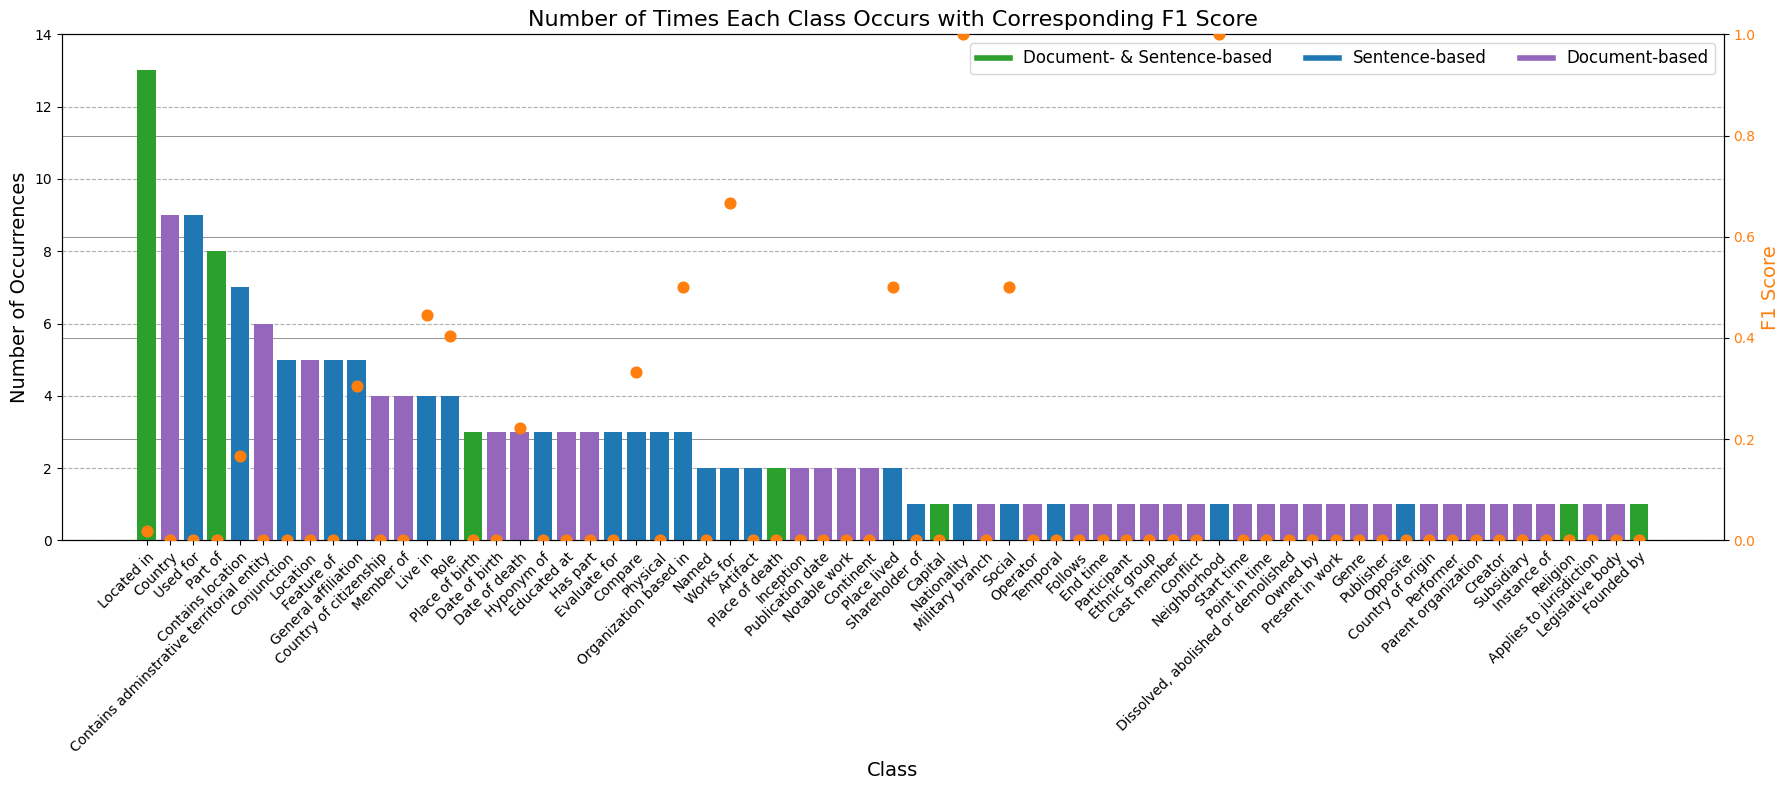

In [31]:
# Assuming you have general_metrics_df, class_metrics_df, and relation_type_counts already prepared
plot_metrics_with_class_occurrences_and_f1_prettier_updated(class_metrics_df, relation_types_count, global_entity_types)


In [55]:
get_number_of_parsing_errors("/work3/s174159/LLM_Thesis/plots/data","6_shot")

2

## GPT4o - 10 shot

In [32]:


# Filepaths for the saved pickle files
scores_rels_filepath = "/work3/s174159/LLM_Thesis/plots/data/dspy_10_shot_scores_rels.pkl"
general_metrics_filepath = "/work3/s174159/LLM_Thesis/plots/data/dspy_10_shot_general_metrics_df.pkl"
class_metrics_filepath = "/work3/s174159/LLM_Thesis/plots/data/dspy_10_shot_general_class_metrics_df.pkl"

# Load the data
scores_rels = load_scores_rels(scores_rels_filepath)
general_metrics_df, class_metrics_df = load_metrics_data(general_metrics_filepath, class_metrics_filepath)


hallucinations:
Collaborates with
Associated with
Feature of
Contains administrative territorial entity
Member
Synonym
Saved image


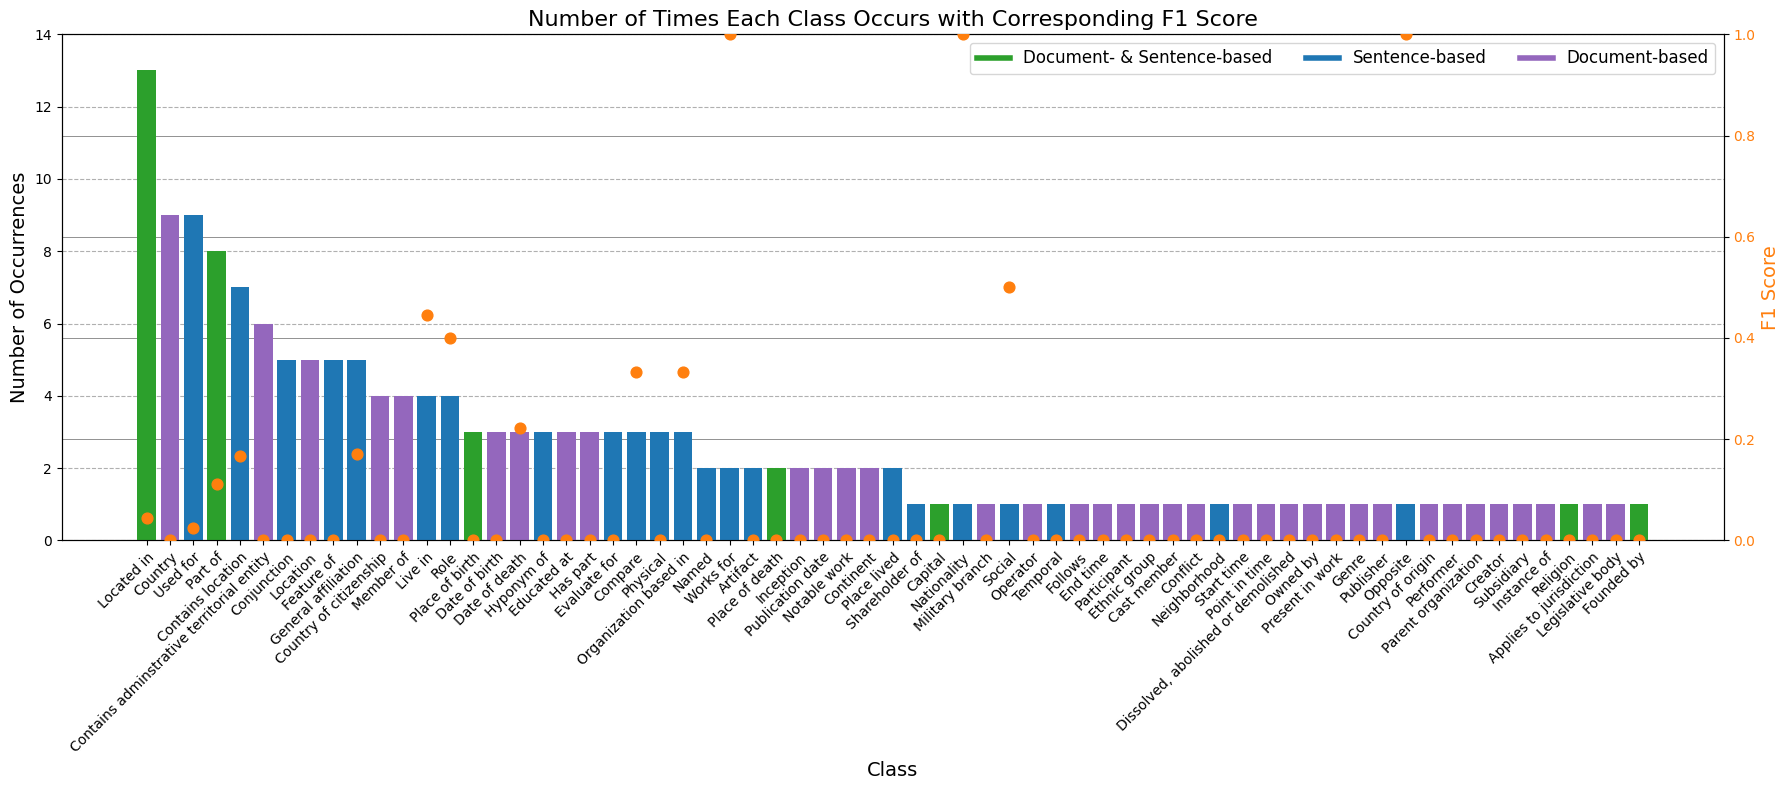

In [33]:
# Assuming you have general_metrics_df, class_metrics_df, and relation_type_counts already prepared
plot_metrics_with_class_occurrences_and_f1_prettier_updated(class_metrics_df, relation_types_count, global_entity_types)


In [56]:
get_number_of_parsing_errors("/work3/s174159/LLM_Thesis/plots/data","10_shot")

3

## GPT4 - Zero

In [34]:


# Filepaths for the saved pickle files
scores_rels_filepath = "/work3/s174159/LLM_Thesis/plots/data/dspy_gdspy_0_shot_scores_rels.pkl"
general_metrics_filepath = "/work3/s174159/LLM_Thesis/plots/data/dspy_gdspy_0_shot_general_metrics_df.pkl"
class_metrics_filepath = "/work3/s174159/LLM_Thesis/plots/data/dspy_gdspy_0_shot_general_class_metrics_df.pkl"

# Load the data
scores_rels = load_scores_rels(scores_rels_filepath)
general_metrics_df, class_metrics_df = load_metrics_data(general_metrics_filepath, class_metrics_filepath)


hallucinations:
Position
based in
Awarded
Feature of
is a part of
Contains administrative territorial entity
Taught
contributed to
Contains
Membership
used for
-----------------------
Saved image


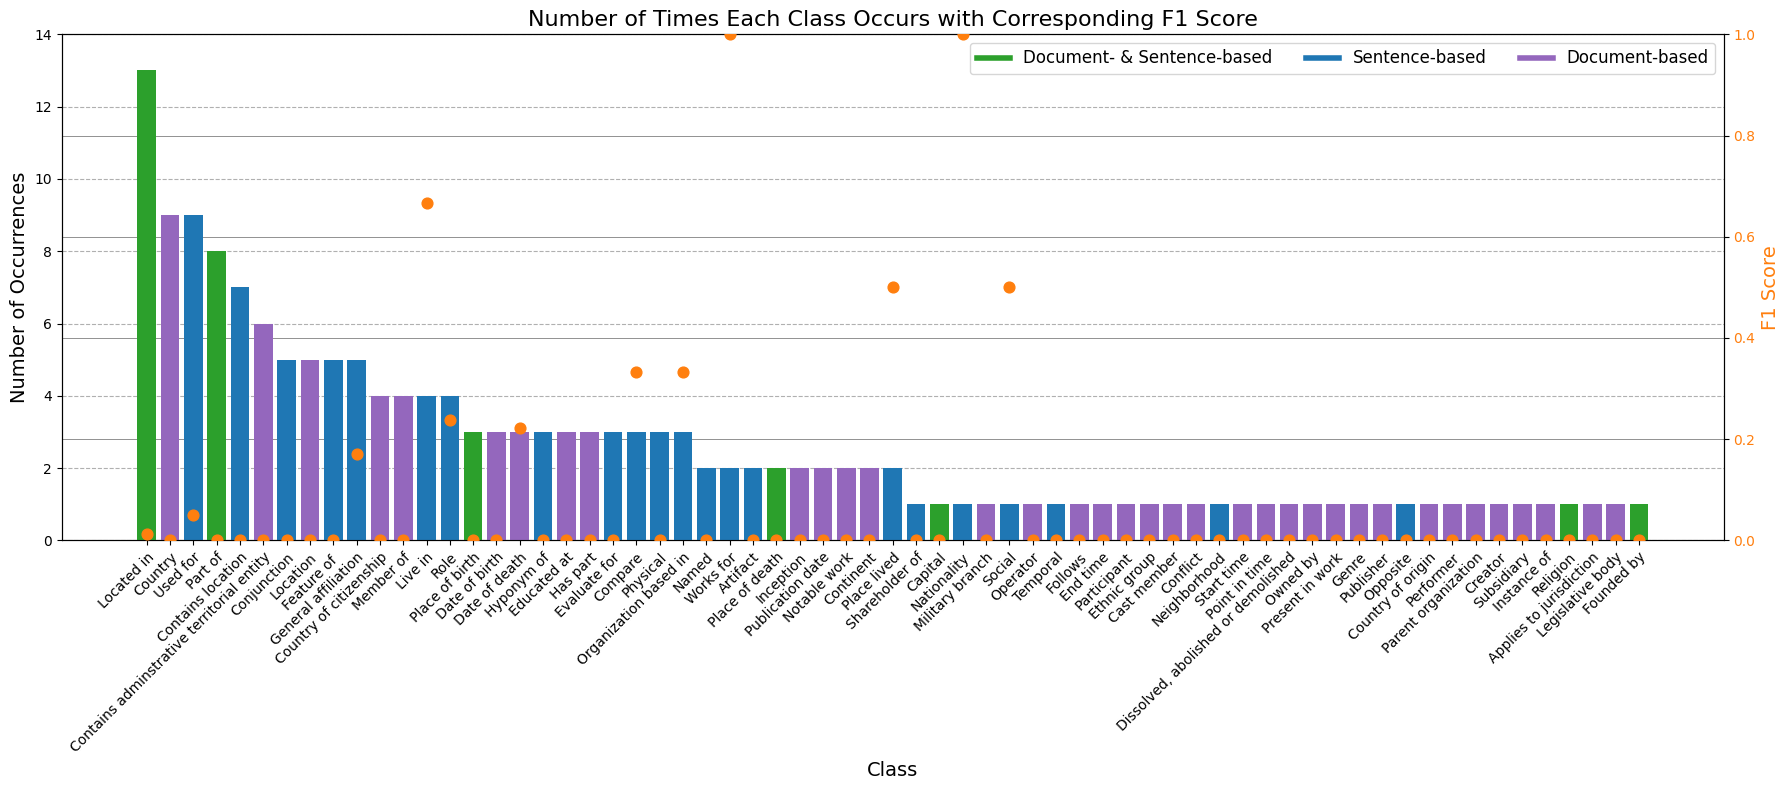

In [57]:
# Assuming you have general_metrics_df, class_metrics_df, and relation_type_counts already prepared
plot_metrics_with_class_occurrences_and_f1_prettier_updated(class_metrics_df, relation_types_count, global_entity_types)


In [59]:
get_number_of_parsing_errors("/work3/s174159/LLM_Thesis/plots/data","gdspy_0_shot")

4

## GPT4 - 3

In [36]:


# Filepaths for the saved pickle files
scores_rels_filepath = "/work3/s174159/LLM_Thesis/plots/data/dspy_g3_shot_scores_rels.pkl"
general_metrics_filepath = "/work3/s174159/LLM_Thesis/plots/data/dspy_g3_shot_general_metrics_df.pkl"
class_metrics_filepath = "/work3/s174159/LLM_Thesis/plots/data/dspy_g3_shot_general_class_metrics_df.pkl"

# Load the data
scores_rels = load_scores_rels(scores_rels_filepath)
general_metrics_df, class_metrics_df = load_metrics_data(general_metrics_filepath, class_metrics_filepath)


hallucinations:
Contributor
Feature of
Contains administrative territorial entity
Awarded by
Saved image


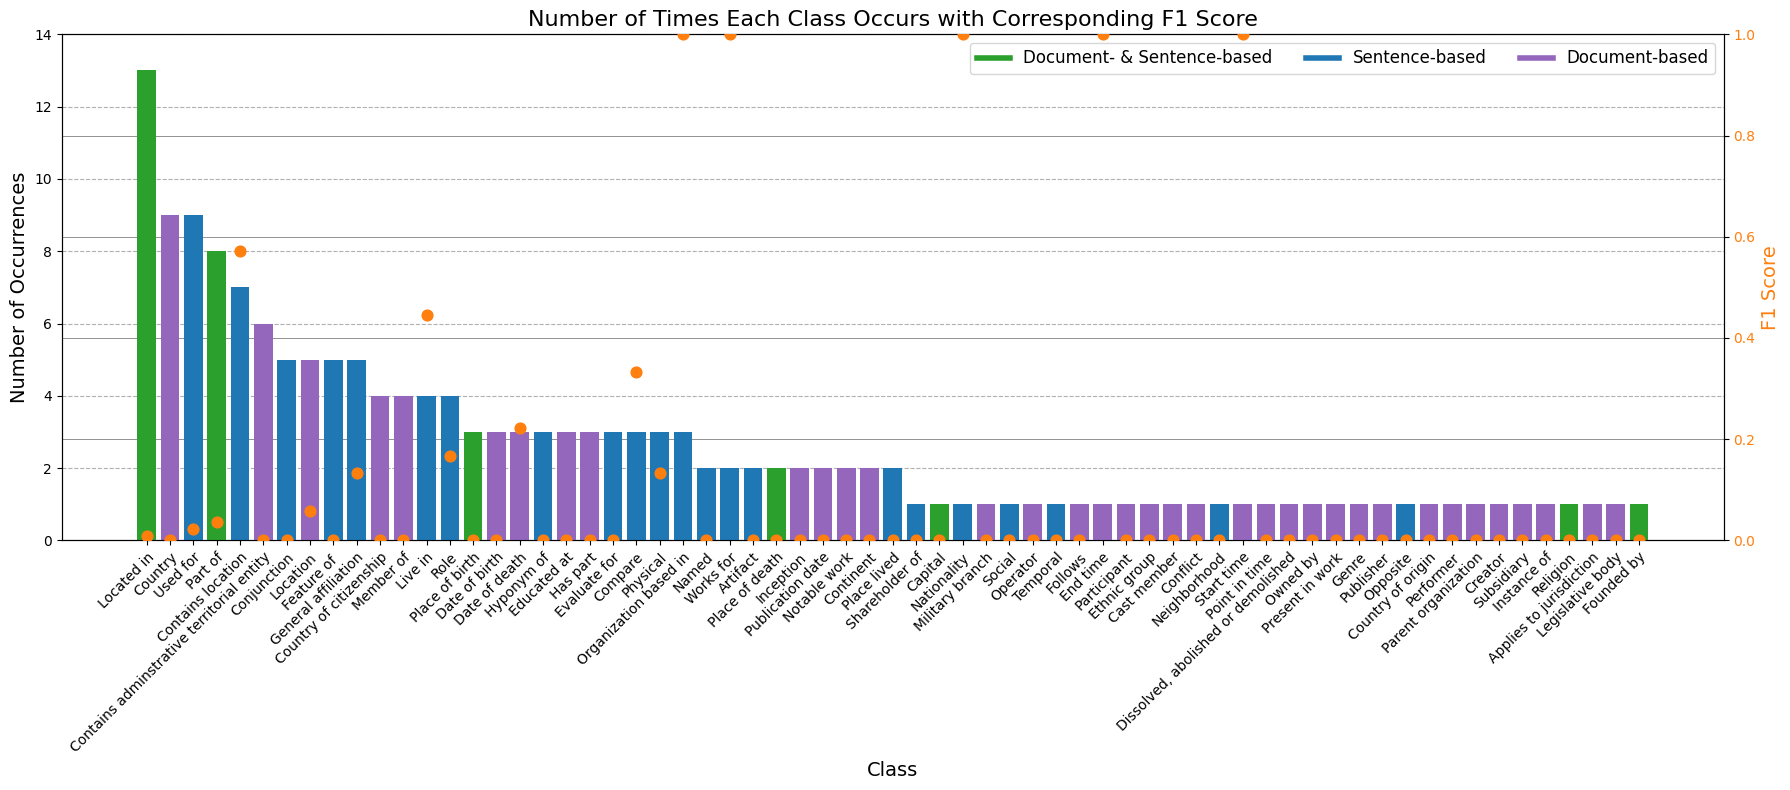

In [37]:
# Assuming you have general_metrics_df, class_metrics_df, and relation_type_counts already prepared
plot_metrics_with_class_occurrences_and_f1_prettier_updated(class_metrics_df, relation_types_count, global_entity_types)


In [60]:
get_number_of_parsing_errors("/work3/s174159/LLM_Thesis/plots/data","g3_shot")

1

## GPT4 - 6

In [38]:


# Filepaths for the saved pickle files
scores_rels_filepath = "/work3/s174159/LLM_Thesis/plots/data/dspy_g6_shot_scores_rels.pkl"
general_metrics_filepath = "/work3/s174159/LLM_Thesis/plots/data/dspy_g6_shot_general_metrics_df.pkl"
class_metrics_filepath = "/work3/s174159/LLM_Thesis/plots/data/dspy_g6_shot_general_class_metrics_df.pkl"

# Load the data
scores_rels = load_scores_rels(scores_rels_filepath)
general_metrics_df, class_metrics_df = load_metrics_data(general_metrics_filepath, class_metrics_filepath)


hallucinations:
Contributed to
Feature of
Related to
Created by
Saved image


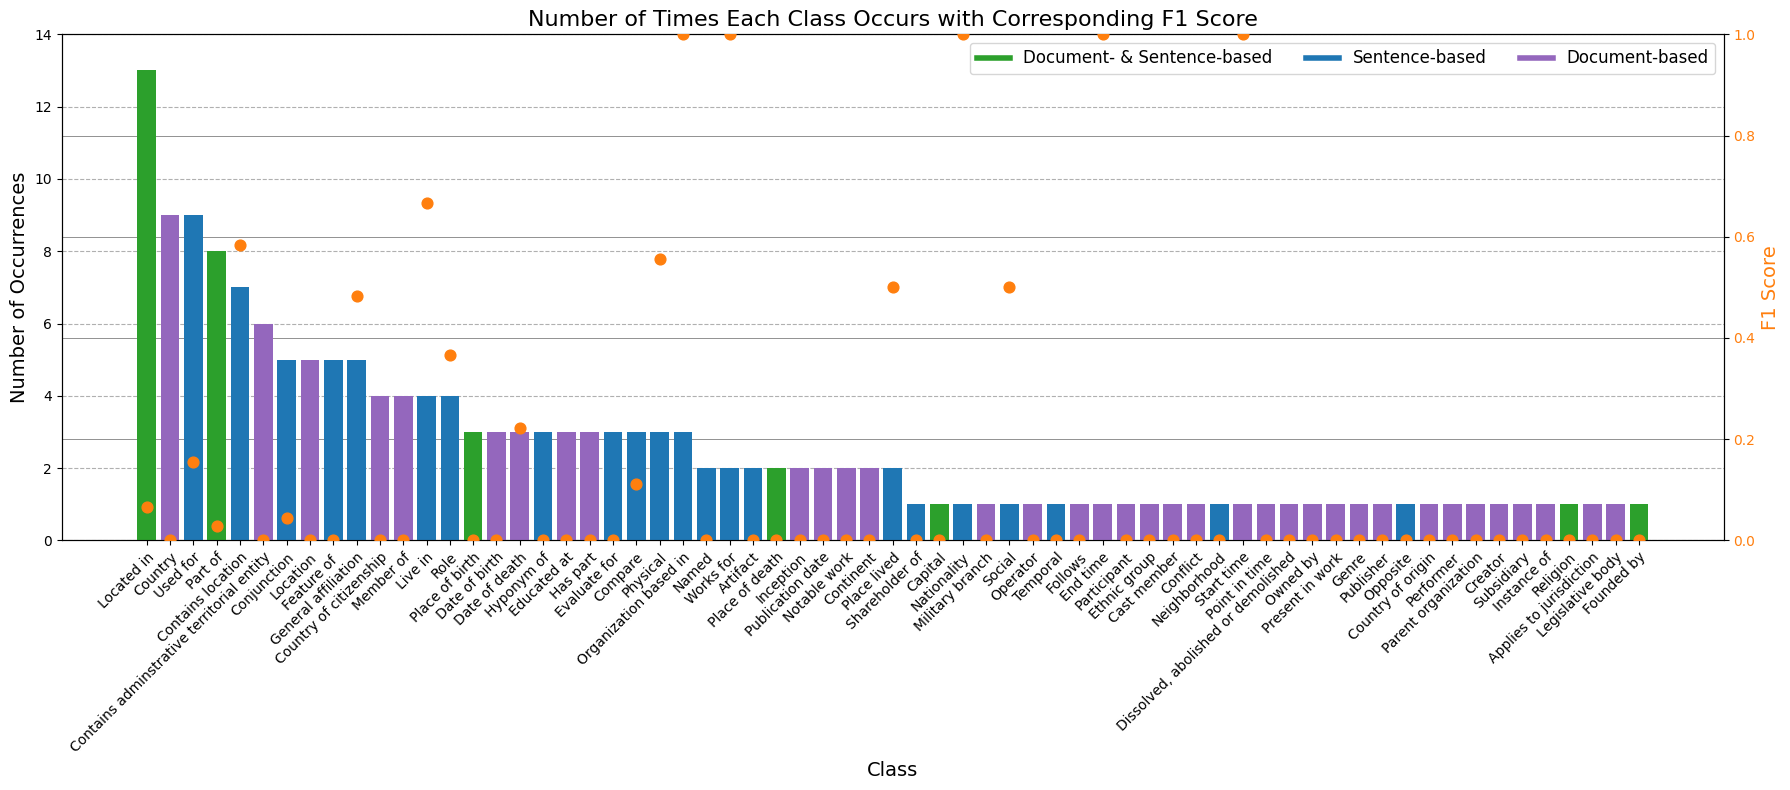

In [39]:
# Assuming you have general_metrics_df, class_metrics_df, and relation_type_counts already prepared
plot_metrics_with_class_occurrences_and_f1_prettier_updated(class_metrics_df, relation_types_count, global_entity_types)


In [61]:
get_number_of_parsing_errors("/work3/s174159/LLM_Thesis/plots/data","g6_shot")

4

## GPT4 - 10

In [40]:


# Filepaths for the saved pickle files
scores_rels_filepath = "/work3/s174159/LLM_Thesis/plots/data/dspy_g10_shot_scores_rels.pkl"
general_metrics_filepath = "/work3/s174159/LLM_Thesis/plots/data/dspy_g10_shot_general_metrics_df.pkl"
class_metrics_filepath = "/work3/s174159/LLM_Thesis/plots/data/dspy_g10_shot_general_class_metrics_df.pkl"

# Load the data
scores_rels = load_scores_rels(scores_rels_filepath)
general_metrics_df, class_metrics_df = load_metrics_data(general_metrics_filepath, class_metrics_filepath)


hallucinations:
Contributed to
Awarded
Affiliation
Feature of
Membership
Saved image


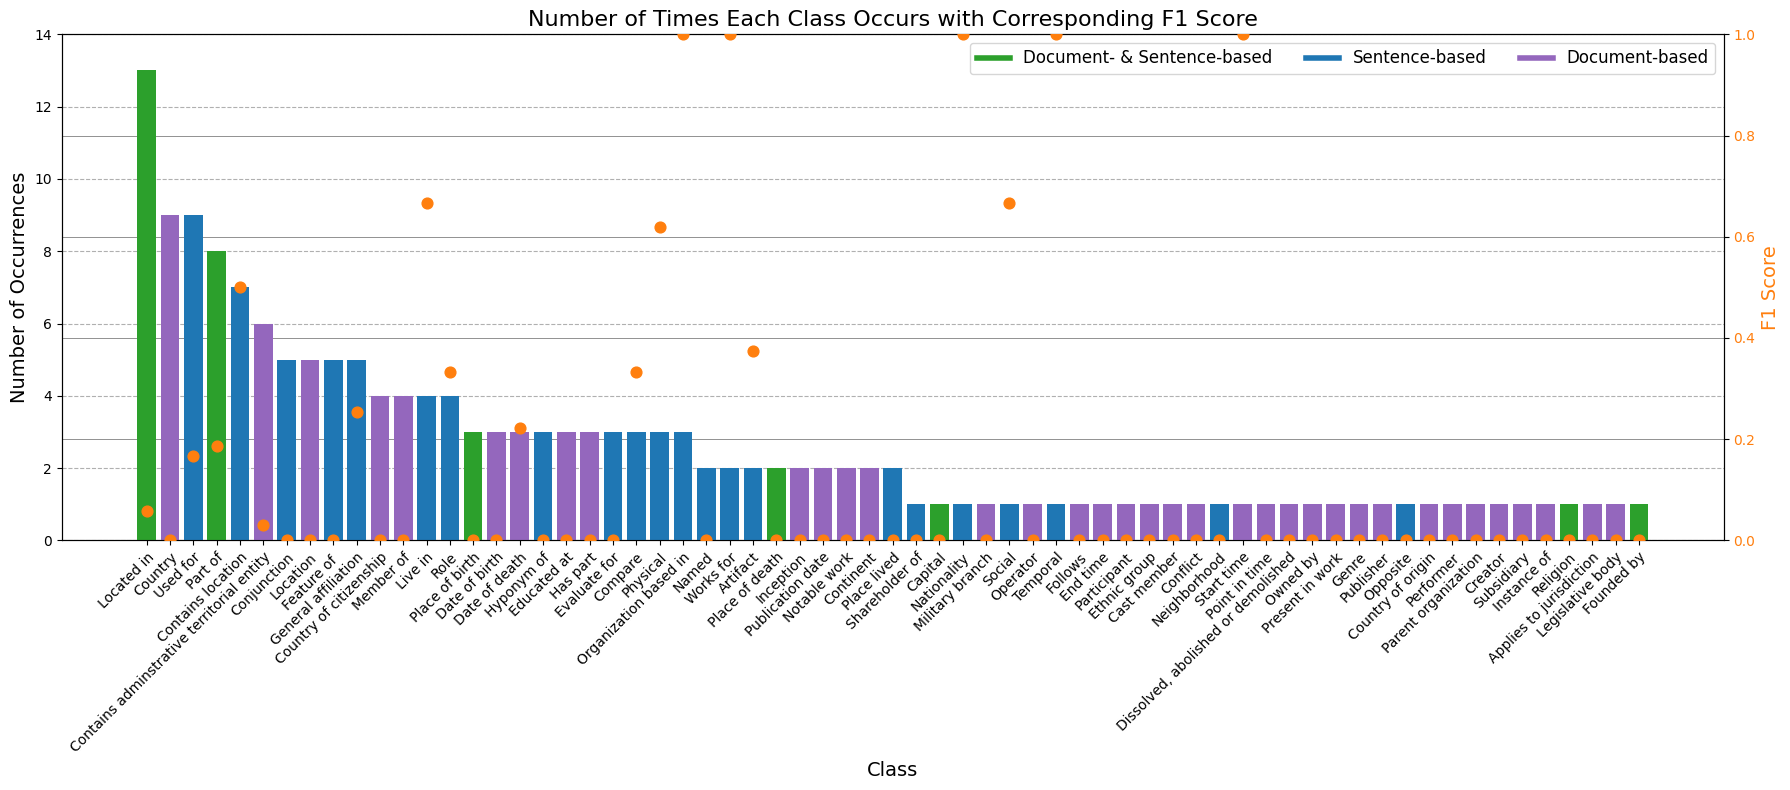

In [41]:
# Assuming you have general_metrics_df, class_metrics_df, and relation_type_counts already prepared
plot_metrics_with_class_occurrences_and_f1_prettier_updated(class_metrics_df, relation_types_count, global_entity_types)


In [62]:
get_number_of_parsing_errors("/work3/s174159/LLM_Thesis/plots/data","g10_shot")

3